# The first part of the assignment requires you to perform multivariate regression to estimate the pricing of house using the availability facility information as features.

**A peek into the dataset :**

 The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.


 Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables.

Ctrl + F9 => to run all the  code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
import seaborn as sns

In [2]:
'''
#To Download from kaggle (Upload Kaggle json file first)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d altavish/boston-housing-dataset --unzip

'''

'\n#To Download from kaggle (Upload Kaggle json file first)\n!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!kaggle datasets download -d altavish/boston-housing-dataset --unzip\n\n'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dudegladiator/QuantClub/main/HousingData.csv')

In [4]:
# Find the keys of all features in the dataset
df.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [5]:
# Find the type of the data
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# Find the shape of the data
df.shape

(506, 14)

In [7]:
# Load the data into a pandas dataframe
# Already Loaded
# Print the head of the dataframe to see how it is
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
df=df.dropna().reset_index(drop=True)

In [9]:
# sklearn datasets have the y value as boston.target. Load the y values as a new column data_df['PRICE']
y=df['MEDV']
df.drop(['MEDV'], axis=1,inplace=True)
y

0      24.0
1      21.6
2      34.7
3      33.4
4      28.7
       ... 
389    17.5
390    16.8
391    20.6
392    23.9
393    22.0
Name: MEDV, Length: 394, dtype: float64

In [10]:
# Visualise the data frame using the .describe() function
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
# Visualise the data frame using the .info() function
df.info()
# Fill

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 40.1 KB


In [12]:
df['CRIM'].isnull().values.any()

False

In [13]:
# Create the train test split using sklearn function
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=1)

In [14]:
# Load the Linear Regression model
model=LinearRegression()


In [15]:
# Fit the loaded model using the train dataset
model.fit(x_train,y_train)

LinearRegression()

In [16]:
# Predict the y values corresponding to test x values
y_pred=model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error
# Find the mse error using the sklearn function between the test y values and predicted y values corresponding to test x values
mse=mean_squared_error(y_test,y_pred)
mse

18.361471173410525

# Second Part : Implementing Logistic Regression

Here you will have to implement a model to predict if a person will buy a product or not given their age.

In [18]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

In [19]:
# Download the dataset
# Source of dataset - https://www.kaggle.com/rakeshrau/social-network-ads
!wget "https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download" -O data.csv -q

In [20]:
# Load the dataset using load_csv function and visualize the data
df = pd.read_csv('data.csv')
y=df['Purchased']

In [21]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [22]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

In [23]:
df["Gender"].corr(df["Purchased"])   #  Bad Correlation

0.042469456264509216

In [24]:
df.drop(['User ID', 'Purchased','EstimatedSalary','Gender'], axis=1,inplace=True)

In [25]:
df=df.dropna().reset_index(drop=True)

In [26]:
# Create the train test split
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=2)

In [27]:
# Import the logistic regression model from sklearn and initialize it
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [28]:
# Fit the model using the training samples
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
# Predict the y values for test_x values
y_pred=model.predict(x_test)

In [30]:
# Calculate the accuracy of the model using sklearn function
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[47,  1],
       [10, 22]])

Text(0.5, 533.5555555555555, 'Predicted label')

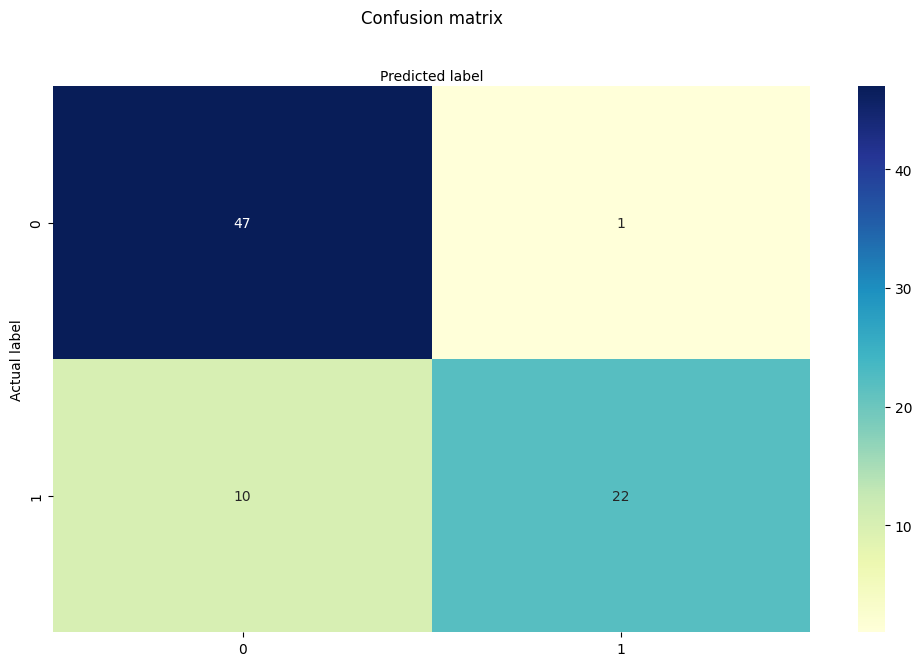

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')